In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor, plot_tree


# QUESTIONS

#### From the e-mail:
* thinks that customers who shop in the store are older than customers who shop online and that older people spend more money on electronics than younger people...changes to the website to attract older buyers.

* gain insight into any factors that can better understand the age of our customers and if it correlates with how much they spend

* Infer any insights about customer purchasing behavior
    * Are there differences in the age of customers between regions? If so, can we predict the age of a customer in a region based on other demographic data?
    * We need to investigate Martin’s hypothesis: Is there any correlation between age of a customer and if the transaction was made online or in the store? Do any other factors predict if a customer will buy online or in our stores?
    
#### From the POA:
* Discretize Age and use it as the dependent variable; experiment with different numbers of bins
* Discretize Amount and use it as the dependent variable. Can a useful model be constructed?
* Use two additional classification algorithms from Sci-Kit Learn: 
    * RandomForestClassifier
    * GradientBoostingClassifier
Other questions:
* What about items? Are these even in the tree? Why or why not?
* What about classifying Where a transaction took place -can that be done successfully?
(Ideally, you should be able to achieve an accuracy of higher than 75%)¿?¿?
* Tune the parameters of the models (maxdepth etc...).
    
#### Summing up:


# Prediction of REGION

In [2]:
#import the data 
data = pd.read_csv("Demographic_Data.csv")

In [3]:
#perform the data cleaning we know are requiered from Task1
data = data.drop_duplicates()
#this line is for reseting the row numeration, from 0 to ...
data=data.reset_index(drop=True)

In [24]:
data

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1
...,...,...,...,...,...
79974,1,71,3,558.82,1
79975,0,59,7,1932.00,3
79976,0,54,1,414.16,2
79977,1,49,4,335.32,1


In [49]:
#first we have to get the data into parts train-test
#we will try to predict the region given the other, regions as dependent variable

#indep vars
X=data.iloc[:,0:4]

#dep vars
Y=data["region"]

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [59]:
#now we build the model and train it
tree1=DecisionTreeClassifier()
tree2=DecisionTreeClassifier()

#we can fit normally 
tree1.fit(x_train,y_train)

#or use cross valitadion for a more robust fitting result
results2=cross_val_score(tree2,X,Y,cv=3)
print(results2,"\n Cross validation: ",results2.mean(), "\n Simple train:",tree1.score(x_test,y_test) )
#but tree2 is not fitted yet, this was done and remove once the function returned the values

[0.56237809 0.56492873 0.56041112] 
 Cross validation:  0.5625726483010527 
 Simple train: 0.5590147536884221


In [67]:
#We could play with the algorithm we apply, and its parameters, to build our model.
#min_samples_split_list=[]
max_depth_list=[None,2,3,4,6,8,10]
for i in max_depth_list:
    tree=DecisionTreeClassifier(max_depth=i)
    results=cross_val_score(tree,X,Y,cv=5)
    print(f"For a max_depth= {i}, the accuracy is {results.mean()}")

For a max_depth= None, the accuracy is 0.5649232752076735
For a max_depth= 2, the accuracy is 0.5903924613538505
For a max_depth= 3, the accuracy is 0.6357668996805312
For a max_depth= 4, the accuracy is 0.642031055591344
For a max_depth= 6, the accuracy is 0.6439065447824913
For a max_depth= 8, the accuracy is 0.6418309680577381
For a max_depth= 10, the accuracy is 0.6393428045976796


In [69]:
#Now lets try the random forest classifier
forest=RandomForestClassifier()
cross_val_score(forest,X,Y,cv=3)

array([0.58750938, 0.5872093 , 0.58025432])

In [71]:
#and play with its parameters
estimators_list=[10,100,300]
max_depth_list=[None,2,3,6,10,20]
for i in estimators_list:
    for j in max_depth_list:
        forest=RandomForestClassifier(n_estimators=i,max_depth=j)
        results=cross_val_score(forest,X,Y,cv=3)
        print(f"For a n_estimators= {i}, and a max_depth= {j}, the accuracy is {results.mean()}")


For a n_estimators= 10, and a max_depth= None, the accuracy is 0.5790519570888258
For a n_estimators= 10, and a max_depth= 2, the accuracy is 0.6110981189725204
For a n_estimators= 10, and a max_depth= 3, the accuracy is 0.6330161425535873
For a n_estimators= 10, and a max_depth= 6, the accuracy is 0.6445817219712483
For a n_estimators= 10, and a max_depth= 10, the accuracy is 0.6410557968836895
For a n_estimators= 10, and a max_depth= 20, the accuracy is 0.6049212939042555
For a n_estimators= 100, and a max_depth= None, the accuracy is 0.5847409323166157
For a n_estimators= 100, and a max_depth= 2, the accuracy is 0.622088367003413
For a n_estimators= 100, and a max_depth= 3, the accuracy is 0.635629360564193
For a n_estimators= 100, and a max_depth= 6, the accuracy is 0.6448692962092318
For a n_estimators= 100, and a max_depth= 10, the accuracy is 0.6428187568479576
For a n_estimators= 100, and a max_depth= 20, the accuracy is 0.6082721611608124
For a n_estimators= 300, and a max_dep

In [105]:
#Now lets try the Gradientboost
grad=GradientBoostingClassifier(n_estimators=200)
cross_val_score(grad,X,Y,cv=3)

array([0.64133533, 0.6384096 , 0.64169699])

In [ ]:
#tests  

In [ ]:
#we can keep trying with: Naives... , NNs, SVN etc.
#however, im goint to take a step back and change some things on the data before doing exactly the same again

In [53]:
#import the data 
data = pd.read_csv("Demographic_Data.csv")

In [54]:
#perform the data cleaning we know are requiered from Task1
data = data.drop_duplicates()
#this line is for reseting the row numeration, from 0 to ...
data=data.reset_index(drop=True)

In [55]:
data

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1
...,...,...,...,...,...
79974,1,71,3,558.82,1
79975,0,59,7,1932.00,3
79976,0,54,1,414.16,2
79977,1,49,4,335.32,1


In [56]:
#I dont want to consider items any more
#also, i want to bin the age values, not allowing to much values
#from the amount, y dont care about the decimals, not even the first value

#AN INTERESTING NEW VARIABLE, COULD BE THE PRICE PER ARTICLE, AMOUNT/ITEMS.


In [57]:
data["amount"]=data["amount"].round(decimals=-2)

In [58]:
data

,in-store,age,items,amount,region
0,0,37,4,300.0,2
1,0,35,2,200.0,2
2,1,45,3,1500.0,4
3,1,46,3,700.0,3
4,1,33,4,1900.0,1
...,...,...,...,...,...
79974,1,71,3,600.0,1
79975,0,59,7,1900.0,3
79976,0,54,1,400.0,2
79977,1,49,4,300.0,1


In [59]:
def custom_round(x, base=5):
    return int(base * round(float(x)/base))

data["age"] = data["age"].apply(lambda x: custom_round(x, base=3))

In [60]:
data

,in-store,age,items,amount,region
0,0,36,4,300.0,2
1,0,36,2,200.0,2
2,1,45,3,1500.0,4
3,1,45,3,700.0,3
4,1,33,4,1900.0,1
...,...,...,...,...,...
79974,1,72,3,600.0,1
79975,0,60,7,1900.0,3
79976,0,54,1,400.0,2
79977,1,48,4,300.0,1


In [50]:
data["amount-per-item"]=(data["amount"]/data["items"]).round(-2)
data

,in-store,age,items,amount,region,amount-per-item
0,0,36,4,300.0,2,100.0
1,0,36,2,200.0,2,100.0
2,1,45,3,1500.0,4,500.0
3,1,45,3,700.0,3,200.0
4,1,33,4,1900.0,1,500.0
...,...,...,...,...,...,...
79974,1,72,3,600.0,1,200.0
79975,0,60,7,1900.0,3,300.0
79976,0,54,1,400.0,2,400.0
79977,1,48,4,300.0,1,100.0


<AxesSubplot:ylabel='Frequency'>

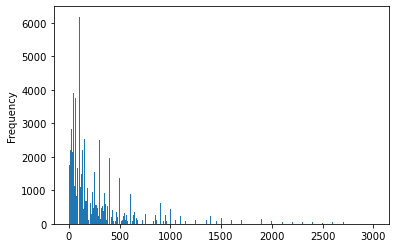

In [49]:
data["amount-per-item"].plot.hist(bins=400)

In [61]:
data_final=data.drop(columns="items")

In [62]:
data_final

,in-store,age,amount,region
0,0,36,300.0,2
1,0,36,200.0,2
2,1,45,1500.0,4
3,1,45,700.0,3
4,1,33,1900.0,1
...,...,...,...,...
79974,1,72,600.0,1
79975,0,60,1900.0,3
79976,0,54,400.0,2
79977,1,48,300.0,1


In [63]:
#now lets try the performance of the models trained with this simplified data
#first we have to get the data into parts train-test

#indep vars
X=data_final.iloc[:,[0,1,2]]

#dep vars
Y=data_final["region"]

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [64]:
#lets use dec trees
max_depth_list=[None,2,3,4,6,8,10]
for i in max_depth_list:
    tree=DecisionTreeClassifier(max_depth=i)
    results=cross_val_score(tree,X,Y,cv=5)
    print(f"For a max_depth= {i}, the accuracy is {results.mean()}")

For a max_depth= None, the accuracy is 0.630240447733065
For a max_depth= 2, the accuracy is 0.6225509378282363
For a max_depth= 3, the accuracy is 0.6343415347428605
For a max_depth= 4, the accuracy is 0.6386801920861584
For a max_depth= 6, the accuracy is 0.6378674607695375
For a max_depth= 8, the accuracy is 0.6366796646019898
For a max_depth= 10, the accuracy is 0.6346541191409137


In [65]:
#lets try random forest
estimators_list=[10,100,300]
max_depth_list=[None,2,3,6,10,20]
for i in estimators_list:
    for j in max_depth_list:
        forest=RandomForestClassifier(n_estimators=i,max_depth=j)
        results=cross_val_score(forest,X,Y,cv=3)
        print(f"For a n_estimators= {i}, and a max_depth= {j}, the accuracy is {results.mean()}")


For a n_estimators= 10, and a max_depth= None, the accuracy is 0.6271646163725935
For a n_estimators= 10, and a max_depth= 2, the accuracy is 0.6169744769363127
For a n_estimators= 10, and a max_depth= 3, the accuracy is 0.6287400866683904
For a n_estimators= 10, and a max_depth= 6, the accuracy is 0.6383175762243948
For a n_estimators= 10, and a max_depth= 10, the accuracy is 0.6355668486873022
For a n_estimators= 10, and a max_depth= 20, the accuracy is 0.6281023498681978
For a n_estimators= 100, and a max_depth= None, the accuracy is 0.6299903687614016
For a n_estimators= 100, and a max_depth= 2, the accuracy is 0.614623846610214
For a n_estimators= 100, and a max_depth= 3, the accuracy is 0.6336038668506544
For a n_estimators= 100, and a max_depth= 6, the accuracy is 0.6384050938838465
For a n_estimators= 100, and a max_depth= 10, the accuracy is 0.6355668425902755
For a n_estimators= 100, and a max_depth= 20, the accuracy is 0.6297778043670675
For a n_estimators= 300, and a max_de

In [39]:
#lets use dec trees
for i in range(40):
    tree=DecisionTreeClassifier(max_depth=7,splitter="random")
    results=cross_val_score(tree,X,Y,cv=5)
    print(f"For a max_depth= {i}, the accuracy is {results.mean()}")

For a max_depth= 0, the accuracy is 0.6330410830278685
For a max_depth= 1, the accuracy is 0.6281648866421043
For a max_depth= 2, the accuracy is 0.6263768880638415
For a max_depth= 3, the accuracy is 0.6244015872677141
For a max_depth= 4, the accuracy is 0.6243014145221206
For a max_depth= 5, the accuracy is 0.6283523444162072
For a max_depth= 6, the accuracy is 0.6347417059016239
For a max_depth= 7, the accuracy is 0.6358919739312758
For a max_depth= 8, the accuracy is 0.6329912221725328
For a max_depth= 9, the accuracy is 0.6322533274769147
For a max_depth= 10, the accuracy is 0.6250892802913139
For a max_depth= 11, the accuracy is 0.6340039323678998
For a max_depth= 12, the accuracy is 0.634116537887207
For a max_depth= 13, the accuracy is 0.6355543574859015
For a max_depth= 14, the accuracy is 0.622701137147369
For a max_depth= 15, the accuracy is 0.630703094654564
For a max_depth= 16, the accuracy is 0.6337914097155111
For a max_depth= 17, the accuracy is 0.6333663120375279
For a

# Prediction of AGE

I will attempt to predict the age for all regions and only in one region at a time

In [4]:
data=pd.read_csv("Demographic_Data.csv")
#do the treatment we know it is enough
data = data.drop_duplicates()
data=data.reset_index(drop=True)
data

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1
...,...,...,...,...,...
79974,1,71,3,558.82,1
79975,0,59,7,1932.00,3
79976,0,54,1,414.16,2
79977,1,49,4,335.32,1


### lets attempt a model without discretization


In [5]:
X=data.iloc[:,[0,2,3,4]]
Y=data["age"]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [6]:
#I test trees, forests and gradient
#We could play with the algorithm we apply, and its parameters, to build our model.
#min_samples_split_list=[]
max_depth_list=[None,2,3,4,6,8,10]
for i in max_depth_list:
    tree=DecisionTreeClassifier(max_depth=i)
    results=cross_val_score(tree,X,Y,cv=5)
    print(f"Decision tree for a max_depth= {i}, the accuracy is {results.mean()}")
    
#forests
estimators_list=[10,100]
max_depth_list=[None,2,3,6,10,20]
for i in estimators_list:
    for j in max_depth_list:
        forest=RandomForestClassifier(n_estimators=i,max_depth=j)
        results=cross_val_score(forest,X,Y,cv=5)
        print(f"RandomForest for a n_estimators= {i}, and a max_depth= {j}, the accuracy is {results.mean()}")
        
#Now lets try the Gradientboost
for i in [10,50,100]:
    grad=GradientBoostingClassifier(n_estimators=i)
    results=cross_val_score(grad,X,Y,cv=3)
    print(f"GradientBoosting for a n_estimators= {i}, the accuracy is {results.mean()}")


Decision tree for a max_depth= None, the accuracy is 0.019880195119114256
Decision tree for a max_depth= 2, the accuracy is 0.022493395308814702
Decision tree for a max_depth= 3, the accuracy is 0.02251839843361903
Decision tree for a max_depth= 4, the accuracy is 0.022568433605744356
Decision tree for a max_depth= 6, the accuracy is 0.022718475023569894
Decision tree for a max_depth= 8, the accuracy is 0.021543156186045572
Decision tree for a max_depth= 10, the accuracy is 0.021455638214023652
RandomForest for a n_estimators= 10, and a max_depth= None, the accuracy is 0.01993022950954994
RandomForest for a n_estimators= 10, and a max_depth= 2, the accuracy is 0.02286850002591301
RandomForest for a n_estimators= 10, and a max_depth= 3, the accuracy is 0.0226809406321571
RandomForest for a n_estimators= 10, and a max_depth= 6, the accuracy is 0.021943255429362186
RandomForest for a n_estimators= 10, and a max_depth= 10, the accuracy is 0.021305594451129194
RandomForest for a n_estimator

KeyboardInterrupt: 

In [2]:
#as we can expect, the accuracy es very low
#now we should do some discretization so it can improve performance

data=pd.read_csv("Demographic_Data.csv")
#do the treatment we know it is enough
data = data.drop_duplicates()
data=data.reset_index(drop=True)

def custom_round(x, base=5):
    return int(base * round(float(x)/base))
data["age"] = data["age"].apply(lambda x: custom_round(x, base=5))

X=data.iloc[:,[0,2,3,4]]
Y=data["age"]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [3]:
#I test trees, forests and gradient
#We could play with the algorithm we apply, and its parameters, to build our model.
#min_samples_split_list=[]
max_depth_list=[None,2,3,4,6,8,10]
for i in max_depth_list:
    tree=DecisionTreeClassifier(max_depth=i)
    results=cross_val_score(tree,X,Y,cv=5)
    print(f"Decision tree for a max_depth= {i}, the accuracy is {results.mean()}")
    
#forests
estimators_list=[10,50,100]
max_depth_list=[None,2,3,6,10,20]
for i in estimators_list:
    for j in max_depth_list:
        forest=RandomForestClassifier(n_estimators=i,max_depth=j)
        results=cross_val_score(forest,X,Y,cv=5)
        print(f"RandomForest for a n_estimators= {i}, and a max_depth= {j}, the accuracy is {results.mean()}")
        
#Now lets try the Gradientboost
for i in [10,50,100]:
    grad=GradientBoostingClassifier(n_estimators=i)
    results=cross_val_score(grad,X,Y,cv=3)
    print(f"GradientBoosting for a n_estimators= {i}, the accuracy is {results.mean()}")


Decision tree for a max_depth= None, the accuracy is 0.1015391398646786
Decision tree for a max_depth= 2, the accuracy is 0.11040396157182467
Decision tree for a max_depth= 3, the accuracy is 0.11211696015595021
Decision tree for a max_depth= 4, the accuracy is 0.1115792788459697
Decision tree for a max_depth= 6, the accuracy is 0.11202937652199858
Decision tree for a max_depth= 8, the accuracy is 0.1111916999256066
Decision tree for a max_depth= 10, the accuracy is 0.11142927260417794
RandomForest for a n_estimators= 10, and a max_depth= None, the accuracy is 0.10262691962456072
RandomForest for a n_estimators= 10, and a max_depth= 2, the accuracy is 0.11104164052891936
RandomForest for a n_estimators= 10, and a max_depth= 3, the accuracy is 0.11166681010671549
RandomForest for a n_estimators= 10, and a max_depth= 6, the accuracy is 0.10906613649348569
RandomForest for a n_estimators= 10, and a max_depth= 10, the accuracy is 0.10845344502740253
RandomForest for a n_estimators= 10, and

#### Some changes I want to try:
* Discretize the amount
* Get ridd of the items
* Different discretizations for the age
* Perform for a single region

In [6]:
#lets discretize the age in different ways
data=pd.read_csv("Demographic_Data.csv")
#do the treatment we know it is enough
data = data.drop_duplicates()
data=data.reset_index(drop=True)

def custom_round(x, base=5):
    return int(base * round(float(x)/base))


data["age"] = data["age"].apply(lambda x: custom_round(x, base=5))
X=data.iloc[:,[0,2,3,4]]
Y=data["age"]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
for i in [3,5,7,8,10,15]:
    print(f"For a rounding on base {i}")
    tree=DecisionTreeClassifier(max_depth=6)
    results=cross_val_score(tree,X,Y,cv=5)
    print(f"Decision tree for a max_depth= {6}, the accuracy is {results.mean()}")
    forest=RandomForestClassifier(n_estimators=50,max_depth=7)
    results=cross_val_score(forest,X,Y,cv=5)
    print(f"RandomForest for a n_estimators= {50}, and a max_depth= {6}, the accuracy is {results.mean()}")
    grad=GradientBoostingClassifier(n_estimators=10)
    results=cross_val_score(grad,X,Y,cv=3)
    print(f"GradientBoosting for a n_estimators= {10}, the accuracy is {results.mean()}")
    

For a rounding on base 3
Decision tree for a max_depth= 6, the accuracy is 0.11204188042946965
RandomForest for a n_estimators= 50, and a max_depth= 6, the accuracy is 0.11081658504654297
GradientBoosting for a n_estimators= 10, the accuracy is 0.11187936571149053
For a rounding on base 5
Decision tree for a max_depth= 6, the accuracy is 0.11204188042946965
RandomForest for a n_estimators= 50, and a max_depth= 6, the accuracy is 0.11015391468998854
GradientBoosting for a n_estimators= 10, the accuracy is 0.11186686258570906
For a rounding on base 7
Decision tree for a max_depth= 6, the accuracy is 0.11202937652199858
RandomForest for a n_estimators= 50, and a max_depth= 6, the accuracy is 0.11119168976364129
GradientBoosting for a n_estimators= 10, the accuracy is 0.11186686258570906
For a rounding on base 8
Decision tree for a max_depth= 6, the accuracy is 0.11202937652199858
RandomForest for a n_estimators= 50, and a max_depth= 6, the accuracy is 0.1115167694705796
GradientBoosting f

In [49]:
#lets discretize the age in different ways
#now in intervals 18-30 =0, 30-60 = 1 , 60 and older = 2
data=pd.read_csv("Demographic_Data.csv")
#do the treatment we know it is enough
data = data.drop_duplicates()
data=data.reset_index(drop=True)

def age_interval(age):
    if age<30:
        interval=0
    if (age>=30) and (age<=60):
        interval=1
    if age>60:
        interval=2
    return interval

age_interval_vect=np.vectorize(age_interval)

ages_aux=data["age"].to_numpy()
intervals=age_interval_vect(ages_aux)

data["age-interval"]=intervals
data

,in-store,age,items,amount,region,age-interval
0,0,37,4,281.03,2,1
1,0,35,2,219.51,2,1
2,1,45,3,1525.70,4,1
3,1,46,3,715.25,3,1
4,1,33,4,1937.50,1,1
...,...,...,...,...,...,...
79974,1,71,3,558.82,1,2
79975,0,59,7,1932.00,3,1
79976,0,54,1,414.16,2,1
79977,1,49,4,335.32,1,1


In [51]:
X=data.iloc[:,[0,2,3,4]]
Y=data["age-interval"]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [11]:
tree=DecisionTreeClassifier(max_depth=6)
results=cross_val_score(tree,X,Y,cv=5)
print(f"Decision tree for a max_depth= {6}, the accuracy is {results.mean()}")
forest=RandomForestClassifier(n_estimators=50,max_depth=7)
results=cross_val_score(forest,X,Y,cv=5)
print(f"RandomForest for a n_estimators= {50}, and a max_depth= {6}, the accuracy is {results.mean()}")
grad=GradientBoostingClassifier(n_estimators=10)
results=cross_val_score(grad,X,Y,cv=3)
print(f"GradientBoosting for a n_estimators= {10}, the accuracy is {results.mean()}")


Decision tree for a max_depth= 6, the accuracy is 0.6401680484203578
RandomForest for a n_estimators= 50, and a max_depth= 6, the accuracy is 0.6410682812935182
GradientBoosting for a n_estimators= 10, the accuracy is 0.6411057906267331


#### How to chose the best age intervals?


In [8]:
data=pd.read_csv("Demographic_Data.csv")
#do the treatment we know it is enough
data = data.drop_duplicates()
data=data.reset_index(drop=True)

In [16]:
age_unique=data["age"].value_counts().sort_index()

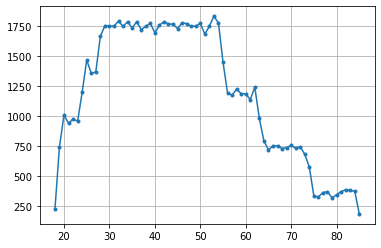

In [27]:
age_unique.plot.line(marker=".")
plt.grid()

In [11]:
#lets discretize the age in different ways
#now in intervals 18-30 =0, 30-55 = 1 , 55 - 75 = 2 and older than 75 = 3
data=pd.read_csv("Demographic_Data.csv")
#do the treatment we know it is enough
data = data.drop_duplicates()
data=data.reset_index(drop=True)

def age_interval(age):
    if age<30:
        interval=0
    elif (age>=30) and (age<=55):
        interval=1
    elif (age>55) and (age<75):
        interval=2
    elif age>=75:
        interval=3
    return interval

age_interval_vect=np.vectorize(age_interval)

ages_aux=data["age"].to_numpy()
intervals=age_interval_vect(ages_aux)

data["age-interval"]=intervals
data

,in-store,age,items,amount,region,age-interval
0,0,37,4,281.03,2,1
1,0,35,2,219.51,2,1
2,1,45,3,1525.70,4,1
3,1,46,3,715.25,3,1
4,1,33,4,1937.50,1,1
...,...,...,...,...,...,...
79974,1,71,3,558.82,1,2
79975,0,59,7,1932.00,3,2
79976,0,54,1,414.16,2,1
79977,1,49,4,335.32,1,1


In [67]:
def custom_round(x, base=5):
    return int(base * round(float(x)/base))
data["age-interval"] = data["age"].apply(lambda x: custom_round(x, base=20))
data["age-interval"].value_counts()

40    36844
60    22262
20    13637
80     7236
Name: age-interval, dtype: int64

In [69]:
#now I'll try 3 changes, first not using the items variable
#second rounding amount 
#and lastly looking to each region independently

def evaluation(X,Y,max_depth_tree,max_depth_forest,cv,n_estimators_forest,n_estimators_grad):
    tree=DecisionTreeR (max_depth=max_depth_tree)
    results=cross_val_score(tree,X,Y,cv=cv)
    print(f"Decision tree for a max_depth= {max_depth_tree}, the accuracy is {results.mean()}")
    forest=RandomForestClassifier(n_estimators=n_estimators_forest,max_depth=max_depth_forest)
    results=cross_val_score(forest,X,Y,cv=cv)
    print(f"RandomForest for a n_estimators= {n_estimators_forest}, and a",
          f" max_depth= {max_depth_forest}, the accuracy is {results.mean()}")
    grad=GradientBoostingClassifier(n_estimators=n_estimators_grad)
    results=cross_val_score(grad,X,Y,cv=cv)
    print(f"GradientBoosting for a n_estimators= {n_estimators_grad}, the accuracy is {results.mean()}")  
    return 
#zero, all normal
X=data.loc[:,["in-store","items","amount","region"]]
Y=data["age-interval"]
print("All normal:")
evaluation(X,Y,max_depth_tree=7,max_depth_forest=7,cv=5,n_estimators_forest=50,n_estimators_grad=8)

#first, without items
X=data.loc[:,["in-store","amount","region"]]
Y=data["age-interval"]
print("Without items:")
evaluation(X,Y,max_depth_tree=7,max_depth_forest=7,cv=5,n_estimators_forest=50,n_estimators_grad=8)

#second, rounding amount
data["amount"]=data["amount"].round(1)
X=data.loc[:,["in-store","items","amount","region"]]
Y=data["age-interval"]
print("Round amount (with items):")
evaluation(X,Y,max_depth_tree=7,max_depth_forest=7,cv=5,n_estimators_forest=50,n_estimators_grad=8)
data["amount"]=data["amount"].round(1)
X=data.loc[:,["in-store","amount","region"]]
Y=data["age-interval"]
print("Round amount (without items):")
evaluation(X,Y,max_depth_tree=7,max_depth_forest=7,cv=5,n_estimators_forest=50,n_estimators_grad=8)


#Third, separated in regions
print("Separated in regions")

for i in [1,2,3,4]:
    print(f" \n \n In region {i} \n")
    data_aux=data.loc[data["region"]==i].copy()
    data_aux["amount"]=data_aux["amount"].round(1)
    X=data_aux.loc[:,["in-store","items","amount","region"]]
    Y=data_aux["age-interval"]
    print("Round amount (with items):")
    evaluation(X,Y,max_depth_tree=7,max_depth_forest=7,cv=5,n_estimators_forest=50,n_estimators_grad=8)
    data_aux["amount"]=data_aux["amount"].round(1)
    X=data_aux.loc[:,["in-store","amount","region"]]
    Y=data_aux["age-interval"]
    print("Round amount (without items):")
    evaluation(X,Y,max_depth_tree=7,max_depth_forest=7,cv=5,n_estimators_forest=50,n_estimators_grad=8)





All normal:
Decision tree for a max_depth= 7, the accuracy is 0.5648607830294554
RandomForest for a n_estimators= 50, and a  max_depth= 7, the accuracy is 0.5663736761011134
GradientBoosting for a n_estimators= 8, the accuracy is 0.5666362425242134
Without items:
Decision tree for a max_depth= 7, the accuracy is 0.5652358760212092
RandomForest for a n_estimators= 50, and a  max_depth= 7, the accuracy is 0.5663986823526763
GradientBoosting for a n_estimators= 8, the accuracy is 0.5666362425242134
Round amount (with items):
Decision tree for a max_depth= 7, the accuracy is 0.564960808035707
RandomForest for a n_estimators= 50, and a  max_depth= 7, the accuracy is 0.5664611987632733
GradientBoosting for a n_estimators= 8, the accuracy is 0.5666362425242134
Round amount (without items):
Decision tree for a max_depth= 7, the accuracy is 0.565360906497334
RandomForest for a n_estimators= 50, and a  max_depth= 7, the accuracy is 0.5663611714119527
GradientBoosting for a n_estimators= 8, the a

Mucha mejor la separacion que yo he hecho que separar en 20 40 60 80

In [16]:
#what if I use regresion trees, tiene mas sentido no?
X=data.loc[:,["in-store","items","amount","region"]]
Y=data["age-interval"]
tree=DecisionTreeRegressor(max_depth=3)
results=cross_val_score(tree,X,Y,cv=5)
print(f"Decision tree for a max_depth= {6}, the accuracy is {results.mean()}")
forest=RandomForestRegressor(n_estimators=50,max_depth=7)
results=cross_val_score(forest,X,Y,cv=5)
print(f"RandomForest for a n_estimators= {50}, and a max_depth= {6}, the accuracy is {results.mean()}")


Decision tree for a max_depth= 6, the accuracy is 0.22299756999516163
RandomForest for a n_estimators= 50, and a max_depth= 6, the accuracy is 0.2277933247696851


# Prediction of CHANNEL

In [23]:
#lets discretize the age in different ways
#now in intervals 18-30 =0, 30-55 = 1 , 55 - 75 = 2 and older than 75 = 3
data=pd.read_csv("Demographic_Data.csv")
#do the treatment we know it is enough
data = data.drop_duplicates()
data=data.reset_index(drop=True)
data

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1
...,...,...,...,...,...
79974,1,71,3,558.82,1
79975,0,59,7,1932.00,3
79976,0,54,1,414.16,2
79977,1,49,4,335.32,1


In [40]:
data_new=data.join(pd.get_dummies(data["region"],prefix="Region"))

In [41]:
data_new

,in-store,age,items,amount,region,Region_1,Region_2,Region_3,Region_4
0,0,37,4,281.03,2,0,1,0,0
1,0,35,2,219.51,2,0,1,0,0
2,1,45,3,1525.70,4,0,0,0,1
3,1,46,3,715.25,3,0,0,1,0
4,1,33,4,1937.50,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
79974,1,71,3,558.82,1,1,0,0,0
79975,0,59,7,1932.00,3,0,0,1,0
79976,0,54,1,414.16,2,0,1,0,0
79977,1,49,4,335.32,1,1,0,0,0


In [5]:
#what if I use regresion trees, tiene mas sentido no?
X=data.loc[:,["age","items","amount","region"]]
Y=data["in-store"]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
tree=DecisionTreeClassifier(max_depth=3)
results=cross_val_score(tree,X,Y,cv=5)
print(f"Decision tree for a max_depth= {6}, the accuracy is {results.mean()}")
forest=RandomForestClassifier(n_estimators=50,max_depth=7)
results=cross_val_score(forest,X,Y,cv=5)
print(f"RandomForest for a n_estimators= {50}, and a max_depth= {6}, the accuracy is {results.mean()}")


Decision tree for a max_depth= 6, the accuracy is 0.8344065447434069
RandomForest for a n_estimators= 50, and a max_depth= 6, the accuracy is 0.8864826967917345


In [14]:
tree=DecisionTreeClassifier(max_depth=4)
forest=RandomForestClassifier(n_estimators=50,max_depth=7)
tree.fit(x_train,y_train)
forest.fit(x_train,y_train)

RandomForestClassifier(max_depth=7, n_estimators=50)

In [15]:
output=tree.predict(x_test)
output2=forest.predict(x_test)

In [16]:
print(classification_report(y_test.to_numpy(),output))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      8102
           1       0.83      0.83      0.83      7894

    accuracy                           0.84     15996
   macro avg       0.84      0.84      0.84     15996
weighted avg       0.84      0.84      0.84     15996



In [17]:
print(classification_report(y_test.to_numpy(),output2))

              precision    recall  f1-score   support

           0       1.00      0.76      0.87      8102
           1       0.80      1.00      0.89      7894

    accuracy                           0.88     15996
   macro avg       0.90      0.88      0.88     15996
weighted avg       0.90      0.88      0.88     15996



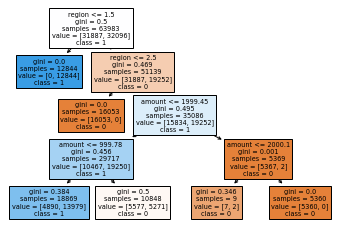

In [18]:
treeplot = plot_tree(tree, feature_names=X.columns,class_names=['0', '1', '2', '3'], filled=True)


In [33]:
#Im going to do the dummy variable change, because regions >1.5 makes no sense at all
data_new

,in-store,age,items,amount,region,Region _1,Region _2,Region _3,Region _4
0,0,37,4,281.03,2,0,1,0,0
1,0,35,2,219.51,2,0,1,0,0
2,1,45,3,1525.70,4,0,0,0,1
3,1,46,3,715.25,3,0,0,1,0
4,1,33,4,1937.50,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
79974,1,71,3,558.82,1,1,0,0,0
79975,0,59,7,1932.00,3,0,0,1,0
79976,0,54,1,414.16,2,0,1,0,0
79977,1,49,4,335.32,1,1,0,0,0


In [65]:
X=data_new.loc[:,["age","items","amount","Region_1","Region_2","Region_3","Region_4"]]
Y=data_new["in-store"]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [66]:
tree=DecisionTreeClassifier(max_depth=7)
results=cross_val_score(tree,X,Y,cv=5)
print(f"Decision tree for a max_depth= {6}, the accuracy is {results.mean()}")
forest=RandomForestClassifier(n_estimators=50,max_depth=7)
results=cross_val_score(forest,X,Y,cv=5)
print(f"RandomForest for a n_estimators= {50}, and a max_depth= {6}, the accuracy is {results.mean()}")


Decision tree for a max_depth= 6, the accuracy is 0.886607728049549
RandomForest for a n_estimators= 50, and a max_depth= 6, the accuracy is 0.8873329195068382


In [67]:
tree=DecisionTreeClassifier(max_depth=4)
forest=RandomForestClassifier(n_estimators=50,max_depth=7)
tree.fit(x_train,y_train)
forest.fit(x_train,y_train)

RandomForestClassifier(max_depth=7, n_estimators=50)

In [68]:
output=tree.predict(x_test)
output2=forest.predict(x_test)

In [69]:
print(classification_report(y_test.to_numpy(),output))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      7988
           1       0.85      0.83      0.84      8008

    accuracy                           0.84     15996
   macro avg       0.84      0.84      0.84     15996
weighted avg       0.84      0.84      0.84     15996



In [70]:
print(classification_report(y_test.to_numpy(),output2))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88      7988
           1       0.82      1.00      0.90      8008

    accuracy                           0.89     15996
   macro avg       0.91      0.89      0.89     15996
weighted avg       0.91      0.89      0.89     15996



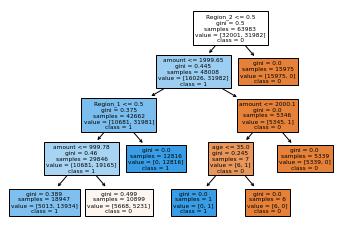

In [71]:
treeplot = plot_tree(tree, feature_names=X.columns,class_names=['0', '1', '2', '3'], filled=True)


<BarContainer object of 7 artists>

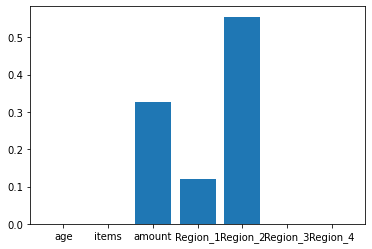

In [72]:
plt.bar(X.columns,tree.feature_importances_)

In [3]:
#if we do the classification for each region, we will hace 2 perfect, but what about the other two
data=pd.read_csv("Demographic_Data.csv")
#do the treatment we know it is enough
data = data.drop_duplicates()
data=data.reset_index(drop=True)
data

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1
...,...,...,...,...,...
79974,1,71,3,558.82,1
79975,0,59,7,1932.00,3
79976,0,54,1,414.16,2
79977,1,49,4,335.32,1


In [6]:
data_region=data.loc[data["region"]==i,["in-store","age","items","amount"]]


In [11]:
for i in [1,2,3,4]:
    print("\n\n","Region ",i,"\n")
    data_region=data.loc[data["region"]==i,["in-store","age","items","amount"]]
    X=data_region.loc[:,["age","items","amount"]]
    Y=data_region["in-store"]
    tree=DecisionTreeClassifier(max_depth=7)
    result=cross_val_score(tree,X,Y,cv=5)
    print("Tree: ",result.mean())
    forest=RandomForestClassifier(n_estimators=50)
    result=cross_val_score(forest,X,Y,cv=5)
    print("Forest: ",result.mean())



 Region  1 

Tree:  1.0
Forest:  1.0


 Region  2 

Tree:  1.0
Forest:  1.0


 Region  3 

Tree:  0.8926666666666667
Forest:  0.8555000000000001


 Region  4 

Tree:  0.7286821436257916
Forest:  0.656764509491854


In [12]:
# Y si no supieran la region?
#if we do the classification for each region, we will hace 2 perfect, but what about the other two
data=pd.read_csv("Demographic_Data.csv")
#do the treatment we know it is enough
data = data.drop_duplicates()
data=data.reset_index(drop=True)

X=data.loc[:,["age","items","amount"]]
Y=data["in-store"]
tree=DecisionTreeClassifier(max_depth=7)
result=cross_val_score(tree,X,Y,cv=5)
print("Tree: ",result.mean())
forest=RandomForestClassifier(n_estimators=50)
result=cross_val_score(forest,X,Y,cv=5)
print("Forest: ",result.mean())


Tree:  0.7258155465718572
Forest:  0.6667499908737734


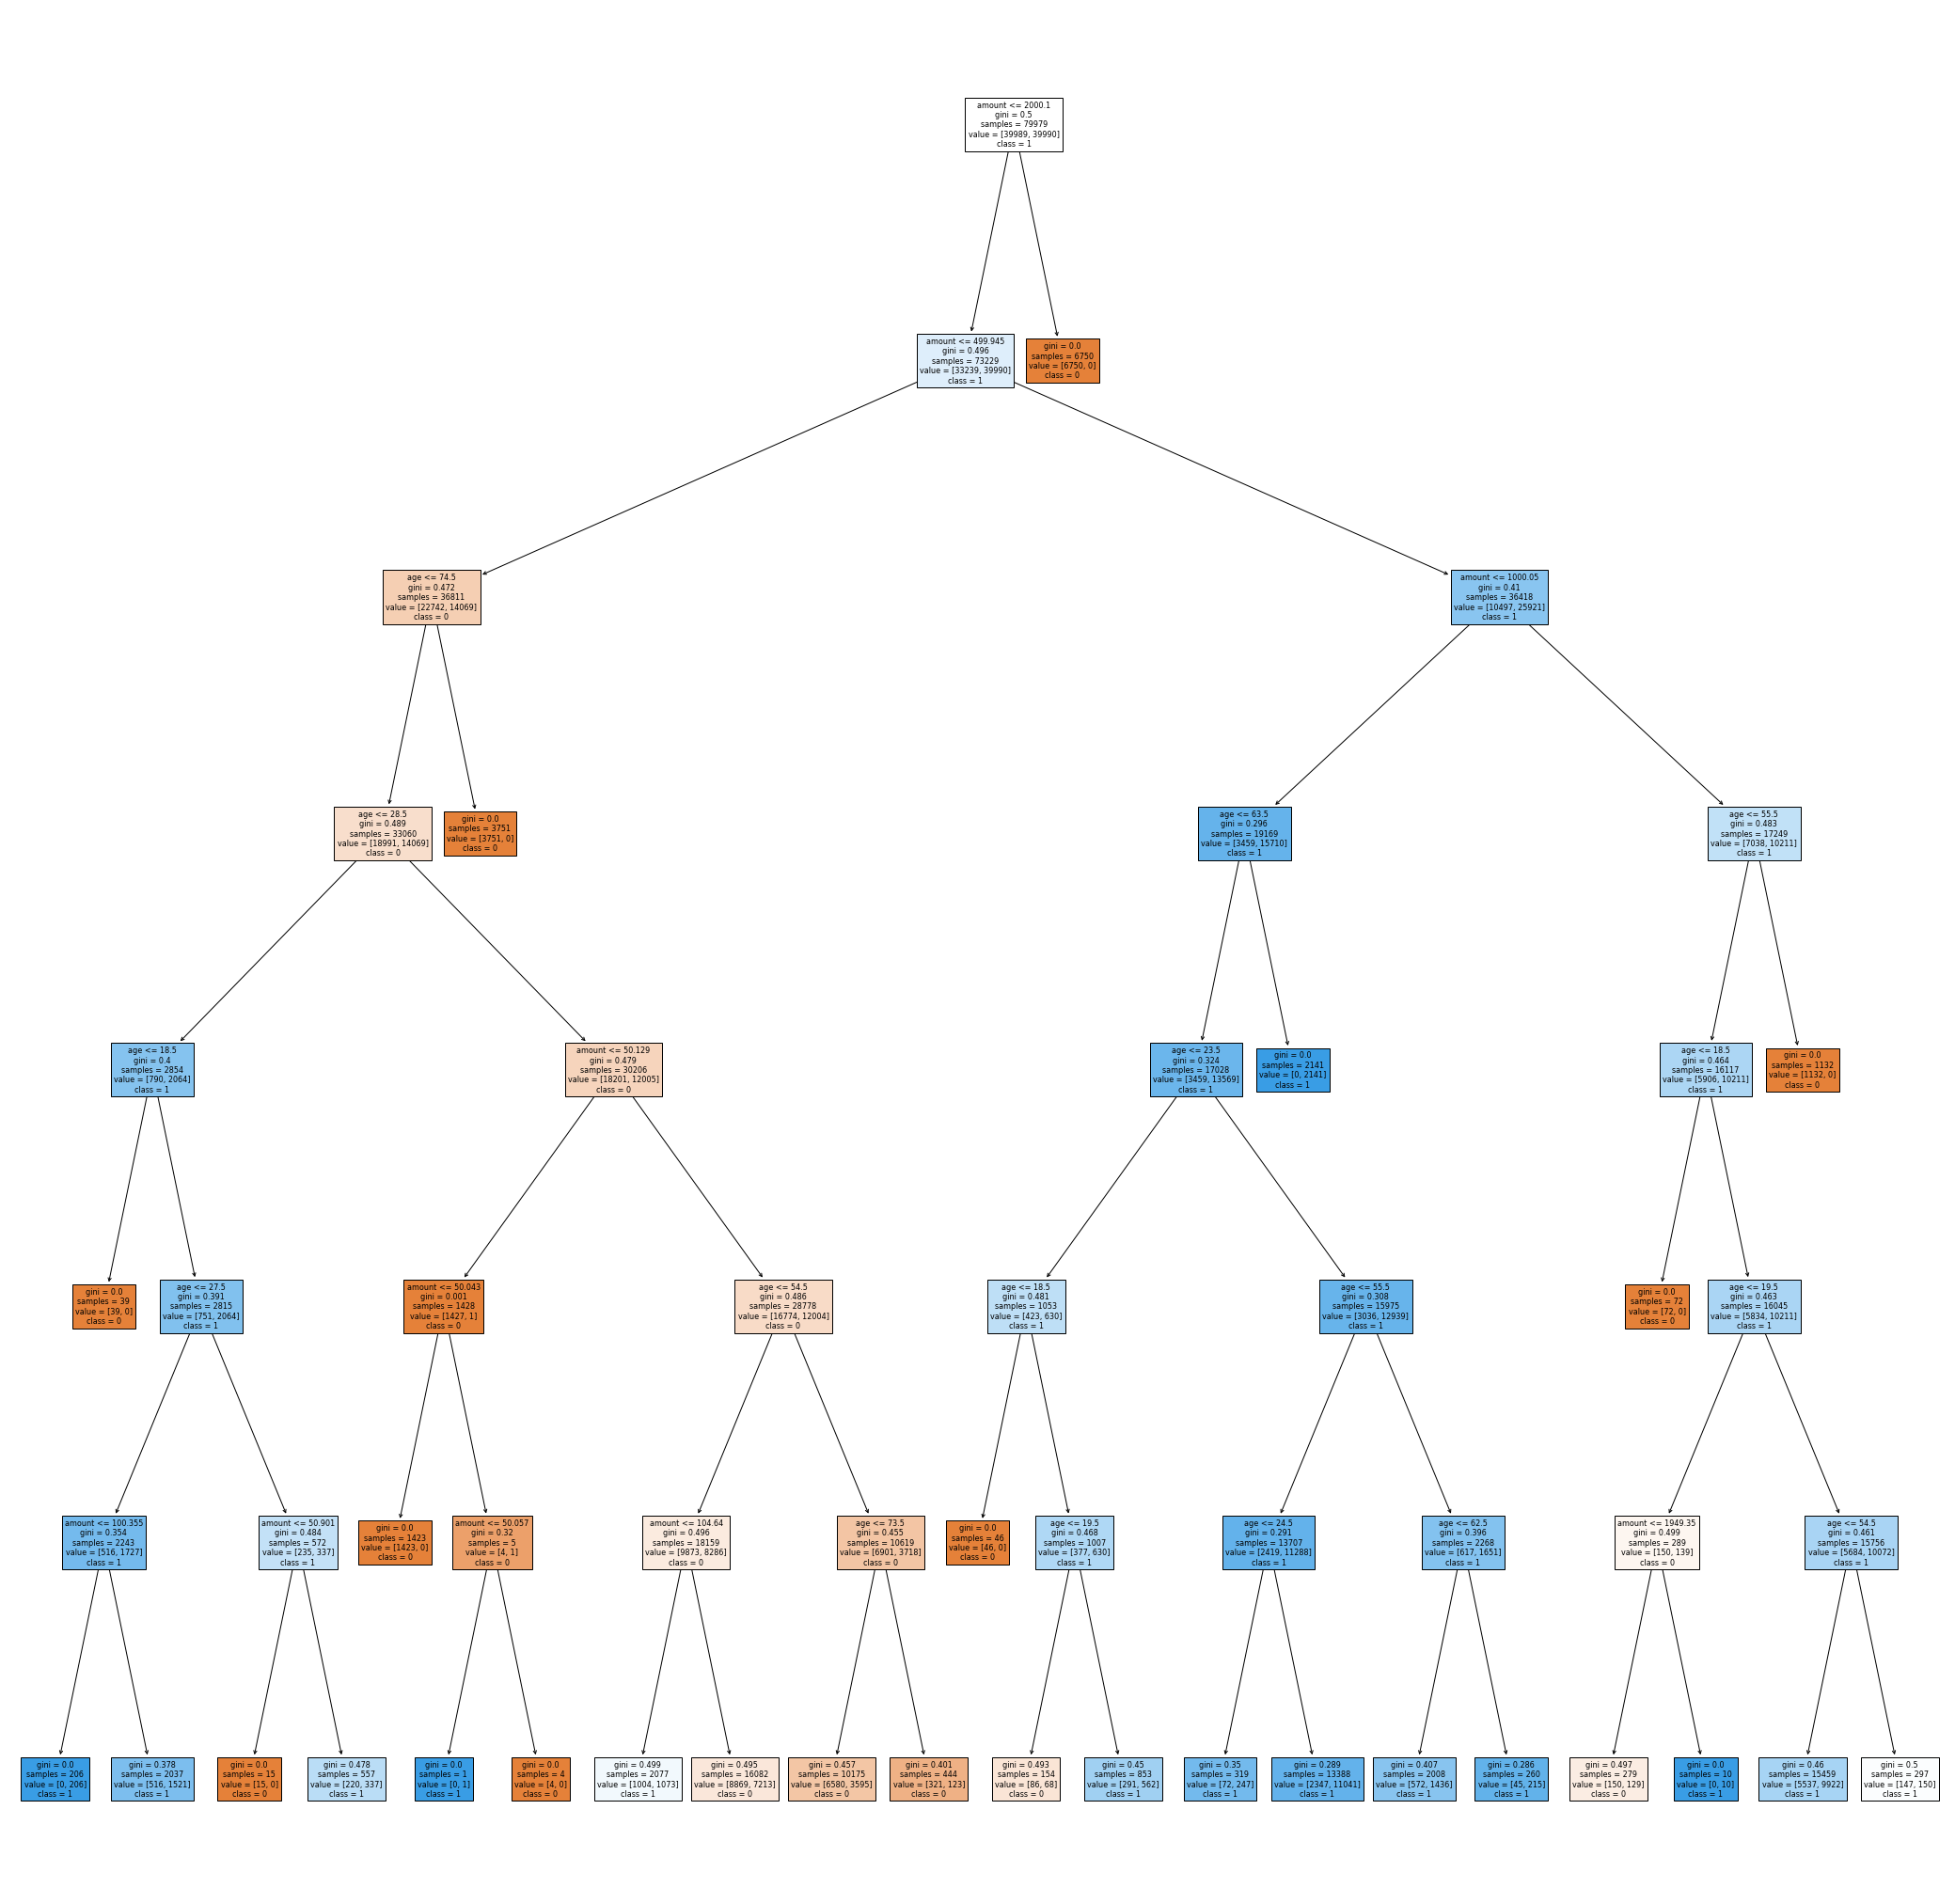

In [22]:
plt.figure(figsize=(37,37))
plot_tree(tree.fit(X,Y),feature_names=X.columns,class_names=['0', '1', '2'], filled=True);
plt.savefig("arbol.png")

<BarContainer object of 3 artists>

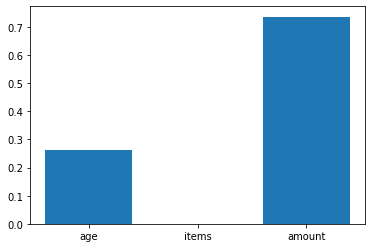

In [21]:
plt.bar(X.columns,tree.feature_importances_)

# Prediction of AMOUNT
Here discretization is a must


0        0
1        0
2        1
3        1
4        1
        ..
79974    1
79975    0
79976    0
79977    1
79978    1
Name: in-store, Length: 79979, dtype: int64

array([1, 1, 1, ..., 1, 0, 0])

# Discretization of age and amount

In [37]:
data=pd.read_csv("Demographic_Data.csv")
#do the treatment we know it is enough
data = data.drop_duplicates()
data=data.reset_index(drop=True)
data

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1
...,...,...,...,...,...
79974,1,71,3,558.82,1
79975,0,59,7,1932.00,3
79976,0,54,1,414.16,2
79977,1,49,4,335.32,1


In [34]:
from sklearn.preprocessing import KBinsDiscretizer as kmeans

In [35]:
discretizer=kmeans(n_bins=3,encode='ordinal', strategy='')

In [44]:
discretizer.fit(data)

/home/arturo/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:189: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  centers = km.fit(column[:, None]).cluster_centers_[:, 0]
/home/arturo/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:200: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn('Bins whose width are too small (i.e., <= '


KBinsDiscretizer(encode='ordinal', n_bins=3, strategy='kmeans')

In [48]:
discretizer.bin_edges_

array([array([0. , 0.5, 1. ]),
       array([18.        , 40.04901439, 59.36283457, 85.        ]),
       array([1.        , 3.34768322, 5.64614397, 8.        ]),
       array([   5.0047    ,  698.75382362, 1619.49598317, 3000.        ]),
       array([1.        , 2.27776389, 3.5       , 4.        ])],
      dtype=object)

In [68]:
#usando Dtrees para hacer la discretizacion
data=pd.read_csv("Demographic_Data.csv")
#do the treatment we know it is enough
data = data.drop_duplicates()
data=data.reset_index(drop=True)
xtrain,xtest,ytrain,ytest=train_test_split(data,data["in-store"].to_frame(),test_size=0.2)

In [69]:
tree_model = DecisionTreeClassifier(max_depth=2)
tree_model.fit(xtrain.age.to_frame(), ytrain)
xtrain['Age_tree']=tree_model.predict_proba(xtrain.age.to_frame())[:,1] 

<ipython-input-69-009d6fcda72f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtrain['Age_tree']=tree_model.predict_proba(xtrain.age.to_frame())[:,1]


In [71]:
pd.concat( [xtrain.groupby(['Age_tree'])['age'].min(),
            xtrain.groupby(['Age_tree'])['age'].max()], axis=1)

,age,age
Age_tree,,
0.000000,75,85
0.422529,55,74
0.557437,18,54


# Dimension reduction

In [26]:
data=pd.read_csv("Demographic_Data.csv")
#do the treatment we know it is enough
data = data.drop_duplicates()
data=data.reset_index(drop=True)
datanew=data.iloc[:,0:4]
datanew

,in-store,age,items,amount
0,0,37,4,281.03
1,0,35,2,219.51
2,1,45,3,1525.70
3,1,46,3,715.25
4,1,33,4,1937.50
...,...,...,...,...
79974,1,71,3,558.82
79975,0,59,7,1932.00
79976,0,54,1,414.16
79977,1,49,4,335.32


In [27]:
from sklearn.manifold import MDS
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(data[:1000])

In [28]:
mds = MDS(2,random_state=0)
X_2d = mds.fit_transform(X_scaled)

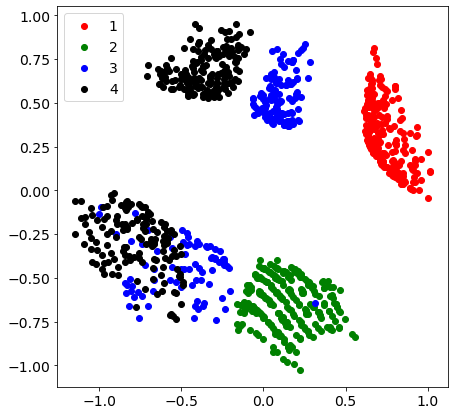

In [30]:
colors = ['red','green','blue',"black"]
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
for i in np.unique(data[:1000].region):
  subset = X_2d[data[:1000].region == i]
  
  x = [row[0] for row in subset]
  y = [row[1] for row in subset]
  plt.scatter(x,y,c=colors[i-1],label=i)
plt.legend()
plt.show()